In [7]:
import numpy as np
from matplotlib import pyplot as plt

from UncertainSCI.distributions import BetaDistribution
from UncertainSCI.model_examples import laplace_ode_1d
from UncertainSCI.pce import PolynomialChaosExpansion

from UncertainSCI.vis import piechart_sensitivity, quantile_plot, mean_stdev_plot


In [8]:
#  3 things must be specified:
#  - A parameter distribution
#  - The capacity of the PCE model (here, polynomial space)
#  - The physical model

#  Distribution setup

In [9]:
# Number of parameters
Nparams = 3

# Three independent parameters with different Beta distributions
p1 = BetaDistribution(alpha=0.5, beta=1.)
p2 = BetaDistribution(alpha=1., beta=0.5)
p3 = BetaDistribution(alpha=1., beta=1.)

plabels = ['a', 'b', 'z']

# # Polynomial order
order = 5

In [10]:
# # Model:
# -d/dx a(x,p) d/dx u(x,p) = f(x)
#
# with x in [-1,1] discretized with N points, where a(x,p) is a
# Fourier-Series-parameterized diffusion model with the variables pj.
# See the laplace_ode_1d method in UncertainSCI/model_examples.py for
# details.

In [11]:
N = 100
x, model = laplace_ode_1d(Nparams, N=N)

In [12]:
# # Building the PCE
# Generate samples first, then manually query model, then give model output to pce.
pce = PolynomialChaosExpansion(distribution=[p1, p2, p3], order=order, plabels=plabels)
pce.generate_samples()

print('This queries the model {0:d} times'.format(pce.samples.shape[0]))

Precomputing data for Jacobi parameters (alpha,beta) = (0.000000, -0.500000)...Done
Precomputing data for Jacobi parameters (alpha,beta) = (-0.500000, 0.000000)...Done
This queries the model 66 times


In [13]:
model_output = np.zeros([pce.samples.shape[0], N])
for ind in range(pce.samples.shape[0]):
    model_output[ind, :] = model(pce.samples[ind, :])
pce.build(model_output=model_output)

array([3.01206067e-37, 3.78220767e-16, 1.41571395e-15, 2.89771340e-15,
       4.54599072e-15, 6.06669006e-15, 7.20344759e-15, 7.78334561e-15,
       7.74464890e-15, 7.13998916e-15, 6.11526237e-15, 4.87086716e-15,
       3.61603383e-15, 2.52772263e-15, 1.72297668e-15, 1.24886884e-15,
       1.08901370e-15, 1.18164096e-15, 1.44240631e-15, 1.78554802e-15,
       2.13905496e-15, 2.45220811e-15, 2.69625173e-15, 2.86043962e-15,
       2.94612145e-15, 2.96108804e-15, 2.91548360e-15, 2.81963202e-15,
       2.68341034e-15, 2.51646376e-15, 2.32856605e-15, 2.12966543e-15,
       1.92946891e-15, 1.73668452e-15, 1.55818756e-15, 1.39839388e-15,
       1.25903686e-15, 1.13940863e-15, 1.03699170e-15, 9.48313417e-16,
       8.69819957e-16, 7.98589049e-16, 7.32761945e-16, 6.71656030e-16,
       6.15594129e-16, 5.65540445e-16, 5.22657143e-16, 4.87890359e-16,
       4.61667102e-16, 4.43745356e-16, 4.33220075e-16, 4.28655842e-16,
       4.28298435e-16, 4.30312935e-16, 4.33003442e-16, 4.34983722e-16,
      

In [14]:
## Postprocess PCE: statistics are computable:
mean = pce.mean()
stdev = pce.stdev()
global_sensitivity, variable_interactions = pce.global_sensitivity()
quantiles = pce.quantile([0.25, 0.5, 0.75]) #  0.25, median, 0.75 quantile

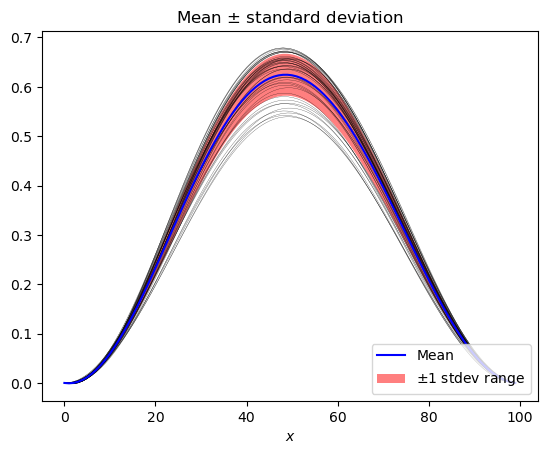

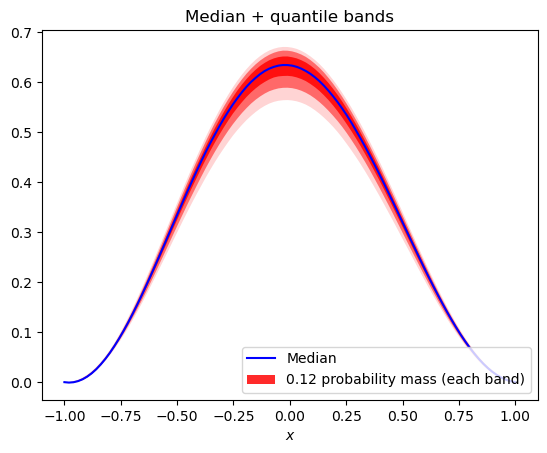

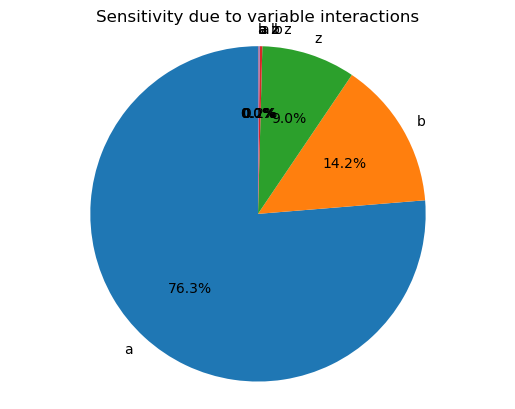

In [15]:
## Visualization
mean_stdev_plot(pce, ensemble=50)
quantile_plot(pce, bands=3, xvals=x, xlabel='$x$')
piechart_sensitivity(pce)

plt.show()